In [1]:
from __future__ import print_function
from time import time

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm

from grakel import datasets
from grakel import GraphKernel

from matplotlib import pylab as pl

In [2]:
# Loads the Mutag dataset from:
# https://ls11-www.cs.tu-dortmund.de/staff/morris/graphkerneldatasets
# the biggest collection of benchmark datasets for graph_kernels.
mutag = datasets.fetch_dataset("MUTAG", verbose=False)
G, y = mutag.data, mutag.target

# Train-test split of graph data
G_train, G_test, y_train, y_test = train_test_split(G, y, test_size=0.1, random_state=42)


In [3]:
start = time()
# Initialise a weifeiler kernel, with a dirac base_kernel.
gk = GraphKernel(kernel=[{"name": "weisfeiler_lehman", "niter": 5},
                         {"name": "subtree_wl"}], normalize=True)

# Calculate the kernel matrix.
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)
end = time()

In [4]:
# Initialise an SVM and fit.
clf = svm.SVC(kernel='precomputed', C=1)
clf.fit(K_train, y_train)

# Predict and test.
y_pred = clf.predict(K_test)

# Calculate accuracy of classification.
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", str(round(acc*100, 2)), "% | Took:",
      str(round(end - start, 2)), "s")

Accuracy: 84.21 % | Took: 0.12 s


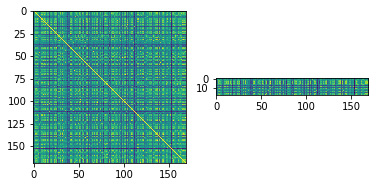

In [5]:
fig = pl.figure()
pl.subplot(121)
pl.imshow(K_train)
pl.subplot(122)
pl.imshow(K_test)
pl.show()

In [10]:
K_train.shape

(169, 169)

In [8]:
G_train[0]

[{(2186, 2187),
  (2187, 2186),
  (2187, 2188),
  (2187, 2195),
  (2188, 2187),
  (2188, 2189),
  (2188, 2193),
  (2189, 2188),
  (2189, 2190),
  (2190, 2189),
  (2190, 2191),
  (2191, 2190),
  (2191, 2192),
  (2191, 2196),
  (2192, 2191),
  (2192, 2193),
  (2193, 2188),
  (2193, 2192),
  (2193, 2194),
  (2194, 2193),
  (2194, 2195),
  (2195, 2187),
  (2195, 2194),
  (2196, 2191),
  (2196, 2197),
  (2196, 2198),
  (2197, 2196),
  (2198, 2196)},
 {2186: 0,
  2187: 1,
  2188: 0,
  2189: 0,
  2190: 0,
  2191: 0,
  2192: 0,
  2193: 0,
  2194: 0,
  2195: 1,
  2196: 1,
  2197: 2,
  2198: 2},
 {(2186, 2187): 1,
  (2187, 2186): 1,
  (2187, 2188): 2,
  (2187, 2195): 1,
  (2188, 2187): 2,
  (2188, 2189): 1,
  (2188, 2193): 1,
  (2189, 2188): 1,
  (2189, 2190): 2,
  (2190, 2189): 2,
  (2190, 2191): 1,
  (2191, 2190): 1,
  (2191, 2192): 2,
  (2191, 2196): 1,
  (2192, 2191): 2,
  (2192, 2193): 1,
  (2193, 2188): 1,
  (2193, 2192): 1,
  (2193, 2194): 1,
  (2194, 2193): 1,
  (2194, 2195): 2,
  (2195,

In [9]:
len(G)

188